<a href="https://colab.research.google.com/github/ArchitLimaye/OIBSIP/blob/main/Oasis_Infobyte_%7C_Data_Scientist_%7C_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 4**
We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
 that is sent to a massive number of users at one time, frequently containing cryptic
 messages, scams, or most dangerously, phishing content.
 In this Project, use Python to build an email spam detector. Then, use machine learning to
 train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
 started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/spam.csv",encoding="latin1",usecols=["v1","v2"])
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0


In [ ]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.preprocessing import LabelEncoder
opt=LabelEncoder()
df["target"]=opt.fit_transform(df["target"])
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep="first")
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
#Analysis
df["target"].value_counts()

,count
target,
0,4516
1,653


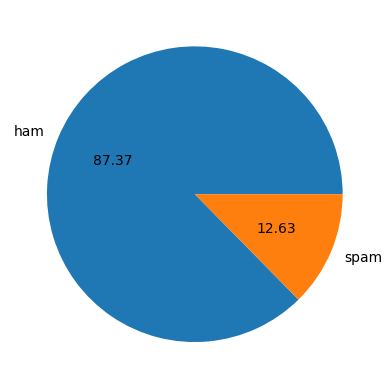

In [ ]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df["num_chars"]=df["text"].apply(len)
df

<ipython-input-249-37046f672c79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_chars"]=df["text"].apply(len)


,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df

<ipython-input-250-2954a24d1d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [ ]:
df["num_sentence"]=df["text"].apply(lambda x:len( nltk.sent_tokenize(x)))
df

<ipython-input-251-424829a38d08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentence"]=df["text"].apply(lambda x:len( nltk.sent_tokenize(x)))


,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
#For ham
df[df["target"]==0][["num_chars","num_words","num_sentence"]].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#For Spam
df[df["target"]==1][["num_chars","num_words","num_sentence"]].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
df

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

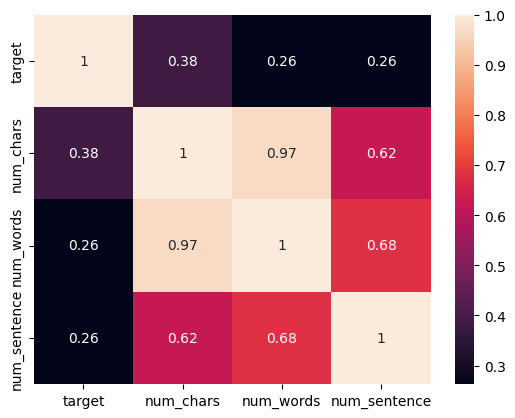

In [ ]:

sns.heatmap(df.drop(columns=["text"]).corr(),annot=True)

In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transformation (text):
  x=text.lower()

  x=nltk.tokenize.word_tokenize(text)

  y=[]
  for i in x:
    if i.isalnum():
      y.append(i)

  x=y[:]
  y.clear()
  for i in x:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  x=y[:]
  y.clear()
  for i in x :
    y.append(ps.stem(i))
  return y

In [ ]:
df["transformed_txt"]=df["text"].apply(transformation)

<ipython-input-259-764f7c6053ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_txt"]=df["text"].apply(transformation)


In [ ]:
df.sample(5)

,target,text,num_chars,num_words,num_sentence,transformed_txt
188,0,Have you got Xmas radio times. If not i will g...,55,14,2,"[have, got, xma, radio, time, if, get]"
3944,0,I will be gentle princess! We will make sweet ...,60,13,2,"[i, gentl, princess, we, make, sweet, gentl, l..."
5207,0,"Babe, I'm answering you, can't you see me ? Ma...",109,29,4,"[babe, i, answer, ca, see, mayb, better, reboo..."
3809,0,"Aight, can you text me the address?",35,9,1,"[aight, text, address]"
4166,0,Are you at work right now ?,27,7,1,"[are, work, right]"


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=5,background_color="white")

In [ ]:
spam_words=wc.generate(df[df["target"]==1]["transformed_txt"].astype("str").str.cat(sep=" "))

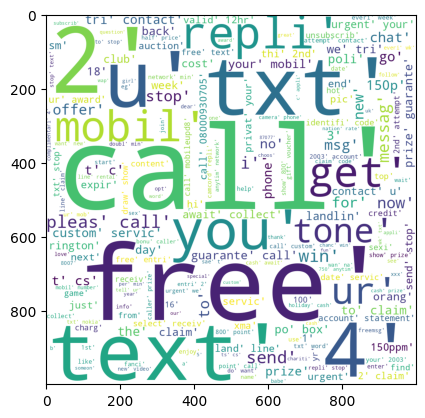

In [ ]:
plt.imshow(spam_words)

In [ ]:
ham_words=wc.generate(df[df["target"]==0]["transformed_txt"].astype("str").str.cat(sep=" "))

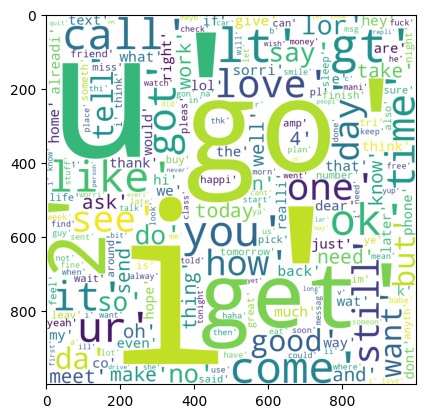

In [ ]:
plt.imshow(ham_words)

In [ ]:
df

,target,text,num_chars,num_words,num_sentence,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, think, goe, usf, live, around, though]"
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,"[thi, 2nd, time, tri, 2, contact, u, pound, pr..."
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,"[will, b, go, esplanad, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,"[piti, mood, so, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,"[the, guy, bitch, i, act, like, interest, buy,..."


In [ ]:
spam_corpus=[]
for msg in df[df["target"]== 1]["transformed_txt"].tolist():
    for word in msg:
      word.split()
      spam_corpus.append(word)

In [ ]:
len(spam_corpus)

10847

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 157),
 ('txt', 141),
 ('text', 122),
 ('u', 122),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('4', 99),
 ('claim', 98),
 ('you', 93),
 ('prize', 82),
 ('get', 74),
 ('your', 71),
 ('to', 70),
 ('new', 66),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('t', 56),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49)]

In [ ]:
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))

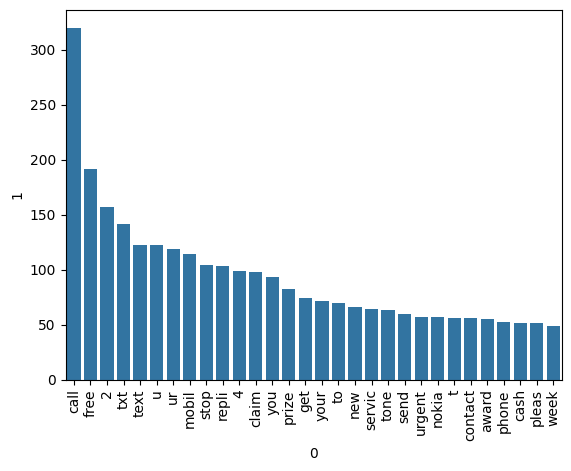

In [ ]:
sns.barplot(data=df1,x=0,y=1)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
#model building
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
df["transformed_txt"]=df["transformed_txt"].astype("str")

<ipython-input-273-8c6bcef0ecc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_txt"]=df["transformed_txt"].astype("str")


In [ ]:
x=cv.fit_transform(df["transformed_txt"])
x

<5169x6826 sparse matrix of type '<class 'numpy.int64'>'
	with 44681 stored elements in Compressed Sparse Row format>

In [ ]:
y=df["target"]
y

,target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
pred=mnb.predict(x_test)
print(accuracy_score(pred,y_test))
print(precision_score(pred,y_test))

0.965183752417795
0.9057971014492754
